In [1]:
import yfinance as yf

# Define stock symbol and time range
stock_symbol = 'AAPL'  # Example: Apple Inc.
start_date = '2010-01-01'
end_date = '2023-10-01'

# Download historical stock data
data = yf.download(stock_symbol, start=start_date, end=end_date)
data.head()


/tmp/ipython-input-2153162826.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.424605,6.439315,6.375672,6.407193,493729600
2010-01-05,6.435712,6.472037,6.401789,6.442317,601904800
2010-01-06,6.333344,6.461230,6.326740,6.435713,552160000
2010-01-07,6.321636,6.364265,6.275705,6.356760,477131200
2010-01-08,6.363664,6.364265,6.276006,6.313230,447610800


In [2]:
# Only using the 'Close' price for simplicity
data = data[['Close']]

# Check for missing values and handle them
data.isnull().sum()  # Identify missing data
data = data.dropna()  # Drop missing values


In [3]:
import numpy as np

# Create a feature based on the previous 5 days' closing prices
for i in range(1, 6):
    data[f'lag_{i}'] = data['Close'].shift(i)

# Drop rows with NaN values created by shifting
data = data.dropna()

# Features (X) and target (y)
X = data.drop('Close', axis=1)
y = data['Close']


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 2.0756019446283815


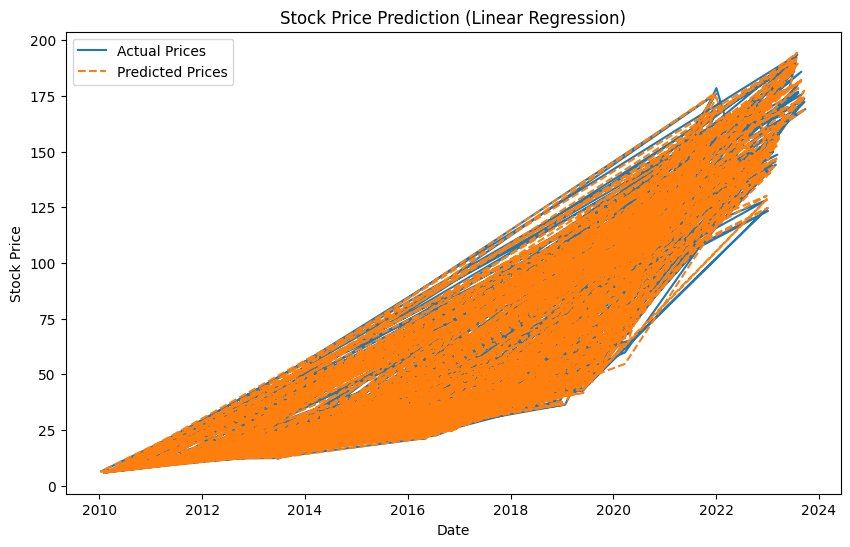

In [5]:
import matplotlib.pyplot as plt

# Plotting the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction (Linear Regression)')
plt.show()
